In [1]:
using Distributions
using Random
using Statistics
using PoissonRandom
using ArgCheck
using QuadGK
using RunStatistics
using RunStatistics: t_obs

#include("MADMAX-runs.ipynb")


In [2]:
#
#
# We center a feature of different widths and amplitudes in the middle of our measuring range
#   
#
# The background is fluctuated, so we take some number of trials to get 
# a statistical average.
#
# We do the analysis for different bin widths to see how bin size interacts
# with signal width
#

# Run multiple tests
n_tests=1000

# Number of fine power bins.  We will group these for testing bin size effects.
nbins=10000


# Nominal Run Stats settings
# We calculate the exact p value for 50 bins, and use the approximate formula to scale up to the full length

# Start with finest binning
Ns1=zeros(2)
Ns1[1]=50    # this is the length for which we use the exact calculation
Ns1[2]=Int(nbins/Ns1[1])    # the scale factor to get the answer for the full range

# Now group two bins at a time
Ns2=zeros(2)
Ns2[1]=50
Ns2[2]=Int(nbins/2/Ns2[1])

# Now group five bins at a time
Ns5=zeros(2)
Ns5[1]=50
Ns5[2]=Int(nbins/5/Ns5[1])

# Now group ten bins at a time
Ns10=zeros(2)
Ns10[1]=50
Ns10[2]=Int(nbins/10/Ns10[1])

# Precision requested for calculation
epsp=1.E-7
#
# Number of signal amplitude steps
N_amplitude=8
amplitude=zeros(N_amplitude)
# Number of signal width steps
N_width=6
width=zeros(N_width)
#
# arrays to keep the p-values for the different tests
pv1=zeros(Real,(N_amplitude,N_width,n_tests))
pv2=zeros(Real,(N_amplitude,N_width,n_tests))
pv5=zeros(Real,(N_amplitude,N_width,n_tests))
pv10=zeros(Real,(N_amplitude,N_width,n_tests))

#
# Start the calculations - loop over the amplitudes and widths and for each over the number of tests

for i=1:N_amplitude
# Signal properties
#
# The amplitude is specified in sigmas of the noise.  We start with no signal to check that 
# we get a flat p-value distribution
#
    amplitude[i]=(i-1)*4
#
# The width is in terms of fine bins
#
    for j=1:N_width
        width[j]=2*j
        ds = Normal(0.,width[j])
#
# Run multiple tests for each setting
#
        for n=1:n_tests
#
# Fill the individual bins with a Gaussian based on noise+signal
#
            Run1=zeros(nbins)
            for bin=1:nbins
                x1=(bin-1) - nbins/2
                x2=bin - nbins/2
                bin_integral=amplitude[i]*(cdf(ds,x2)-cdf(ds,x1))
#
# generate a random background for each test.  We shift the mean of the Gauss distribution to account for 
# the signal.  We assume here that the noise fluctuations dominate and therefore doesn't change with signal.
#
                d = Normal(bin_integral,1.)
                Run1[bin]=rand(d)
#                println(bin," ",Run1[bin])
            end
#
# rebin
#
# First, finest bin size
#
            Squares=t_obs(Run1, 0., 1.)
            pv1[i,j,n] = squares_pvalue_approx(Squares[1],Ns1, epsp)
#
# Now rebin and look again
#
# Double bin size
            step=2
            nbins2=Int(nbins/step)
            Run2=zeros(nbins2)
            midpoint=(nbins/2)/step
    
            newbin=1
            l=1
            while l <= nbins-step
                Run2[newbin]=Run1[l]
                for j=1:step-1
                      Run2[newbin]+=Run1[l+j]
                end
                newbin+=1
                l+=step
            end
# change the background noise level
            variance=(step)
            Squares=t_obs(Run2, 0., variance)
            pv2[i,j,n] = squares_pvalue_approx(Squares[1],Ns2, epsp)
    
# Five times bin size
            step=5
            nbins5=Int(nbins/step)
            Run5=zeros(nbins5)
            midpoint=(nbins/2)/step
    
            newbin=1
            l=1
            while l <= nbins-step
                Run5[newbin]=Run1[l]
                for j=1:step-1
                      Run5[newbin]+=Run1[l+j]
                end
                newbin+=1
                l+=step
            end
# change the background noise level
            variance=(step)
            Squares=t_obs(Run5, 0., variance)
            pv5[i,j,n] = squares_pvalue_approx(Squares[1],Ns5, epsp)

# ten times bin size
            step=10
            nbins10=Int(nbins/step)
            Run10=zeros(nbins10)
            midpoint=(nbins/2)/step
    
            newbin=1
            l=1
            while l <= nbins-step
                Run10[newbin]=Run1[l]
                for j=1:step-1
                    Run10[newbin]+=Run1[l+j]
                end
                newbin+=1
                l+=step
            end
 # change the background noise level
            variance=(step)  
            Squares=t_obs(Run10, 0., variance)
            pv10[i,j,n] = squares_pvalue_approx(Squares[1],Ns10, epsp)
        end
        println(" A=", amplitude[i], " width=",round(width[j],digits=3), "  1 ",round(mean(pv1[i,j,:]),digits=3)," ",round(std(pv1[i,j,:]),digits=3))
        println(" A=", amplitude[i], " width=",round(width[j],digits=3), "  2 ",round(mean(pv2[i,j,:]),digits=3)," ",round(std(pv2[i,j,:]),digits=3))
        println(" A=", amplitude[i], " width=",round(width[j],digits=3), "  5 ",round(mean(pv5[i,j,:]),digits=3)," ",round(std(pv5[i,j,:]),digits=3))
        println(" A=", amplitude[i], " width=",round(width[j],digits=3), " 10 ",round(mean(pv10[i,j,:]),digits=3)," ",round(std(pv10[i,j,:]),digits=3))
    end
end




 A=0.0 width=2.0  1 0.504 0.285
 A=0.0 width=2.0  2 0.502 0.289
 A=0.0 width=2.0  5 0.511 0.295
 A=0.0 width=2.0 10 0.511 0.291
 A=0.0 width=4.0  1 0.503 0.284
 A=0.0 width=4.0  2 0.495 0.287
 A=0.0 width=4.0  5 0.508 0.291
 A=0.0 width=4.0 10 0.498 0.292
 A=0.0 width=6.0  1 0.505 0.289
 A=0.0 width=6.0  2 0.517 0.285
 A=0.0 width=6.0  5 0.504 0.294
 A=0.0 width=6.0 10 0.505 0.291
 A=0.0 width=8.0  1 0.511 0.291
 A=0.0 width=8.0  2 0.518 0.286
 A=0.0 width=8.0  5 0.521 0.293
 A=0.0 width=8.0 10 0.512 0.293
 A=0.0 width=10.0  1 0.496 0.291
 A=0.0 width=10.0  2 0.493 0.291
 A=0.0 width=10.0  5 0.49 0.286
 A=0.0 width=10.0 10 0.489 0.281
 A=0.0 width=12.0  1 0.488 0.291
 A=0.0 width=12.0  2 0.49 0.292
 A=0.0 width=12.0  5 0.501 0.286
 A=0.0 width=12.0 10 0.501 0.281
 A=4.0 width=2.0  1 0.479 0.297
 A=4.0 width=2.0  2 0.473 0.289
 A=4.0 width=2.0  5 0.481 0.289
 A=4.0 width=2.0 10 0.492 0.303
 A=4.0 width=4.0  1 0.49 0.281
 A=4.0 width=4.0  2 0.505 0.296
 A=4.0 width=4.0  5 0.513 0.292
 A=

In [3]:

using DelimitedFiles

open("Table1.dat","w") do io
writedlm(io,amplitude)
writedlm(io,width)
writedlm(io,pv1)
end
open("Table2.dat","w") do io
writedlm(io,amplitude)
writedlm(io,width)
writedlm(io,pv2)
end
open("Table5.dat","w") do io
writedlm(io,amplitude)
writedlm(io,width)
writedlm(io,pv5)
end
open("Table10.dat","w") do io
writedlm(io,amplitude)
writedlm(io,width)
writedlm(io,pv10)
end

In [4]:
using Printf
using LaTeXStrings

#
# Print latex table code
#

open("Meanp.txt","w") do io
println(io,"\\begin{table}")
println(io,"\\centering")
println(io,"\\begin{tabular}{cccccccc}")
println(io,"\\hline")
println(io," A & BinSize & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ \\\\")
println(io," & "," & ",width[1]," & ",width[2]," & ",width[3]," & ",width[4]," & ",width[5]," & ",width[6],"\\\\")
println(io,"\\hline")
for n=1:N_amplitude
    println(io,Int(amplitude[n])," & ",1," & ",round(mean(pv1[n,1,:]), sigdigits=2)," & ",round(mean(pv1[n,2,:]), sigdigits=2)," & ",
            round(mean(pv1[n,3,:]), sigdigits=2)," & ",round(mean(pv1[n,4,:]), sigdigits=2)," & ",
            round(mean(pv1[n,5,:]), sigdigits=2)," & ",round(mean(pv1[n,6,:]), sigdigits=2),"\\\\")
    println(io,Int(amplitude[n])," & ",2," & ",round(mean(pv2[n,1,:]), sigdigits=2)," & ",round(mean(pv2[n,2,:]), sigdigits=2)," & ",
            round(mean(pv2[n,3,:]), sigdigits=2)," & ",round(mean(pv2[n,4,:]), sigdigits=2)," & ",
            round(mean(pv2[n,5,:]), sigdigits=2)," & ",round(mean(pv2[n,6,:]), sigdigits=2),"\\\\")
    println(io,Int(amplitude[n])," & ",5," & ",round(mean(pv5[n,1,:]), sigdigits=2)," & ",round(mean(pv5[n,2,:]), sigdigits=2)," & ",
            round(mean(pv5[n,3,:]), sigdigits=2)," & ",round(mean(pv5[n,4,:]), sigdigits=2)," & ",
            round(mean(pv5[n,5,:]), sigdigits=2)," & ",round(mean(pv5[n,6,:]), sigdigits=2),"\\\\")
    println(io,Int(amplitude[n])," & ",10," & ",round(mean(pv10[n,1,:]), sigdigits=2)," & ",round(mean(pv10[n,2,:]), sigdigits=2)," & ",
            round(mean(pv10[n,3,:]), sigdigits=2)," & ",round(mean(pv10[n,4,:]), sigdigits=2)," & ",
            round(mean(pv10[n,5,:]), sigdigits=2)," & ",round(mean(pv10[n,6,:]), sigdigits=2),"\\\\")
    println(io,"\\hline")
end
println(io,"\\hline")
println(io,"\\end{tabular}")
println(io,"\\caption{Mean of \$p\$-values. The first column gives the amplitude,\$A\$, of the input signal.  
        The second column give the width of the bins in which power is measured, and the succeeding columns
        give the width of the input signal \$\\sigma_{\\rm sig}\$ . }")
println(io,"\\label{tab:Meanp}")
println(io,"\\end{table}")
end





In [5]:
pcut=0.05
pass1=zeros(N_amplitude,N_width)
pass2=zeros(N_amplitude,N_width)
pass5=zeros(N_amplitude,N_width)
pass10=zeros(N_amplitude,N_width)

for n=1:N_amplitude
    amplitude[n]=Int(amplitude[n])
end

for i=1:N_amplitude
    for j=1:N_width
        for k=1:n_tests
            if (pv1[i,j,k]<pcut) pass1[i,j]+=1/n_tests            end
            if (pv2[i,j,k]<pcut) pass2[i,j]+=1/n_tests            end
            if (pv5[i,j,k]<pcut) pass5[i,j]+=1/n_tests            end
            if (pv10[i,j,k]<pcut) pass10[i,j]+=1/n_tests            end
        end
    end
end
#
# Print out results - different tables for different bin groupings
#
# Bin size=1

open("Passpcut.txt","w") do io
println(io,"\\begin{table}")
println(io,"\\centering")
println(io,"\\begin{tabular}{cccccccc}")
println(io,"\\hline")
println(io," A & BinSize & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ & \$\\sigma_{\\rm sig}\$ \\\\")
println(io," & "," & ",width[1]," & ",width[2]," & ",width[3]," & ",width[4]," & ",width[5]," & ",width[6],"\\\\")
println(io,"\\hline")
for n=1:N_amplitude
    println(io,Int(amplitude[n])," & ",1," & ",round(pass1[n,1], sigdigits=2)," & ",round(pass1[n,2], sigdigits=2)," & ",
            round(pass1[n,3], sigdigits=2)," & ",round(pass1[n,4], sigdigits=2)," & ",
            round(pass1[n,5], sigdigits=2)," & ",round(pass1[n,6], sigdigits=2),"\\\\")
    println(io,Int(amplitude[n])," & ",2," & ",round(pass2[n,1], sigdigits=2)," & ",round(pass2[n,2], sigdigits=2)," & ",
            round(pass2[n,3], sigdigits=2)," & ",round(pass2[n,4], sigdigits=2)," & ",
            round(pass2[n,5], sigdigits=2)," & ",round(pass2[n,6], sigdigits=2),"\\\\")    
    println(io,Int(amplitude[n])," & ",5," & ",round(pass5[n,1], sigdigits=2)," & ",round(pass5[n,2], sigdigits=2)," & ",
            round(pass5[n,3], sigdigits=2)," & ",round(pass5[n,4], sigdigits=2)," & ",
            round(pass5[n,5], sigdigits=2)," & ",round(pass5[n,6], sigdigits=2),"\\\\")    
    println(io,Int(amplitude[n])," & ",10," & ",round(pass10[n,1], sigdigits=2)," & ",round(pass10[n,2], sigdigits=2)," & ",
            round(pass10[n,3], sigdigits=2)," & ",round(pass10[n,4], sigdigits=2)," & ",
            round(pass10[n,5], sigdigits=2)," & ",round(pass10[n,6], sigdigits=2),"\\\\")
    println(io,"\\hline")
end
println(io,"\\hline")
println(io,"\\end{tabular}")
println(io,"\\caption{The fraction of trials passing the \$p\\leq 0.05\$ cut. The first column gives the amplitude,\$A\$, of the input signal.  
        The second column give the width of the bins in which power is measured, and the succeeding columns
        give the width of the input signal \$\\sigma_{\\rm sig}\$ . }")
println(io,"\\label{tab:Pass}")
println(io,"\\end{table}")
end



In [6]:
# 
# As a sanity check, we see if the p-value distribution is flat for background only
#
Random.seed!(1234);

nsanity=10000
pv=zeros(nsanity)
for i=1:nsanity
    Run=randn(nbins)
    Squares=t_obs(Run, 0., 1.)
    pv[i] = squares_pvalue_approx(Squares[1],Ns1, epsp)
end

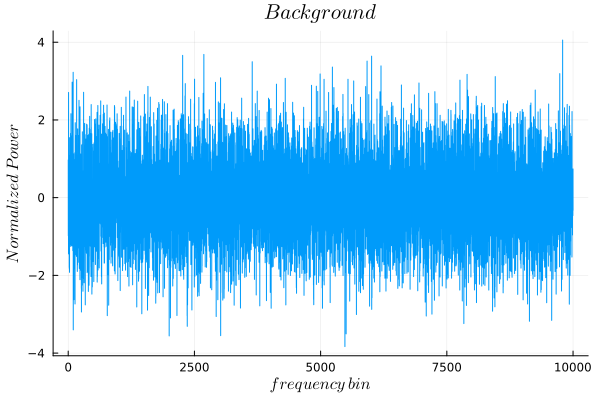

In [7]:
using Plots
#
# Make some useful plots
#
using LaTeXStrings
Random.seed!(1234);
Run=randn(nbins)

p1=plot(Run,lw=1,legend=:none,xlabel=L"frequency \; bin", ylabel=L"Normalized \; Power",title=L"Background")

In [8]:
savefig("Background.pdf")

"/Users/AllenCCaldwell/MADMAX/Analysis/Background.pdf"

In [9]:
Squares=t_obs(Run, 0., 1.)
println(Squares)
pv = squares_pvalue_approx(Squares[1],Ns1, epsp)

(25.363848727311293, [9789, 9790, 9791, 9792, 9793, 9794])


0.11603050397138204

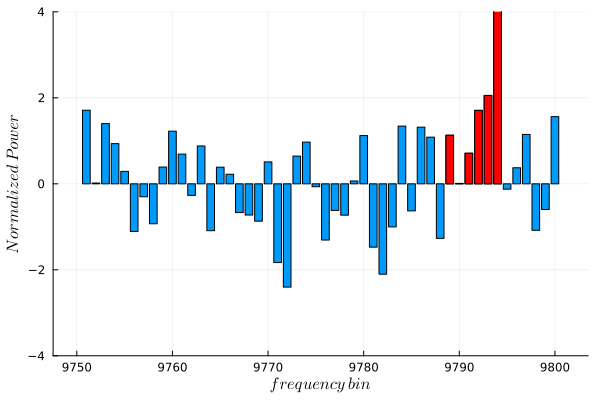

In [10]:
plot(9751:9800,Run[9751:9800],lw=1,seriestype=:bar,legend=:none,xlabel=L"frequency \; bin", ylabel=L"Normalized \; Power",ylims=(-4.,4.))
p2=plot!(9789:9794,Run[9789:9794],lw=1,seriestype=:bar,legend=:none,color="red")

In [11]:
savefig("Background-zoom.pdf")

"/Users/AllenCCaldwell/MADMAX/Analysis/Background-zoom.pdf"

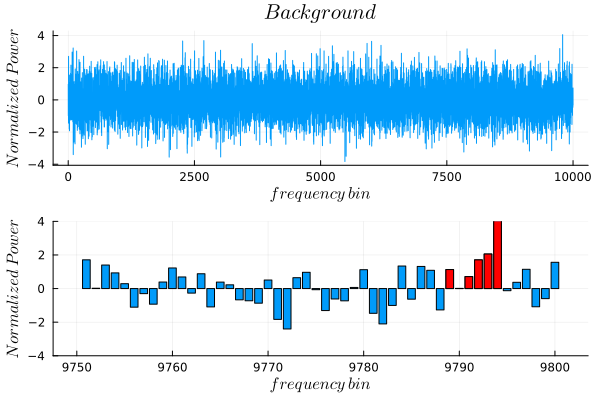

In [12]:
plot(p1,p2,layout=(2,1))

In [13]:
savefig("Background-combined.pdf")

"/Users/AllenCCaldwell/MADMAX/Analysis/Background-combined.pdf"

In [14]:
# 
# As a sanity check, we see if the p-value distribution is flat for background only
#
Random.seed!(1234);

nsanity=10000
pv=zeros(nsanity)
for i=1:nsanity
    Run=randn(nbins)
    Squares=t_obs(Run, 0., 1.)
    pv[i] = squares_pvalue_approx(Squares[1],Ns1, epsp)
end

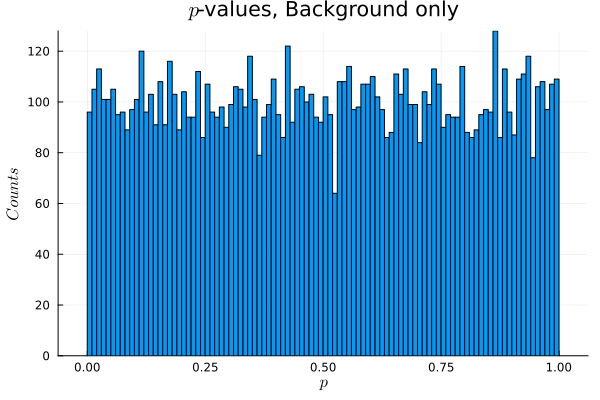

In [15]:
p1=histogram(pv,bins=100,legend=:none,xlabel=L"$p$", ylabel=L"Counts",title=L"$p$-values, Background only")

In [16]:
savefig("sanity.pdf")

"/Users/AllenCCaldwell/MADMAX/Analysis/sanity.pdf"

In [17]:
# Now add a substantial signal and see the distorted p-value distribution

Run1=zeros(nbins)
A=20
w=4
ds = Normal(0.,w)
pvs=zeros(nsanity)

for i=1:nsanity
    for bin=1:nbins
        x1=(bin-1) - nbins/2
        x2=bin - nbins/2
        bin_integral=A*(cdf(ds,x2)-cdf(ds,x1))
#
        d = Normal(bin_integral,1.)
        Run1[bin]=rand(d)
    end       
    Squares=t_obs(Run1, 0., 1.)
    pvs[i] = squares_pvalue_approx(Squares[1],Ns1, epsp)
end

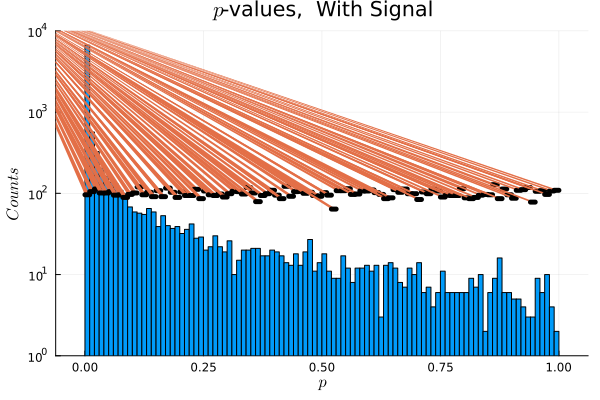

In [18]:
p3=histogram(pvs,bins=100,yaxis=:log10,ylims=(1,10000),legend=:none,xlabel=L"$p$", ylabel=L"Counts",title=L"$p$-values,  With Signal")
p3=histogram!(pv,bins=100,colow="red",xlabel=L"$p$", ylabel=L"Counts",lw=5)

In [19]:
savefig("Back+Sig.pdf")

"/Users/AllenCCaldwell/MADMAX/Analysis/Back+Sig.pdf"